<div style="text-align: center;">
    <h1><b>Practical Work 1 : optimization techniques in 1D</b></h1>
</div>

*Authored in 2025 for educational purpose by S. Cardonna, V. Lleras & F. Marche. If you identify any issues or have suggestions for improvement, feel free to contact me.*  
  
**Introduction**  
For this first practical work, we implement three optimization techniques for finding the minimum of a unimodal function on a given interval:
- Dichotomy method;
- Newton's method;
- Golden Section method.  

Each method will be implemented step-by-step and applied to specific examples. A final comparison highlight their differences in efficiency and convergence.

**Definition (unimodality)**  
A function $f\in\mathcal{C}^0$ is unimodal over $I:=[a, b]$, if
- $f$ has a unique minimum on $I$, denoted by $x^*$;
- $f$ is strictly decreasing on $[a, x^*]$ and strictly increasing on $[x^*, b]$.
    

**Proposition**  
If $f$ is strictly convex over $I$, and attain its maximum at a point $x^*\in \mathring{I}$, then $f$ is unimodal on $I$.

<div style="text-align: center;">
    <h2><b>Part 1 - Dichotomy method</b></h2>
</div>
The method works by iteratively reducing the interval size based on the comparison of function values at two symmetric points near the midpoint of the current interval.

**Flowchart**  
1. Initialize the interval $[a, b]$ and a precision threshold $\varepsilon > 0$.
2. Compute the midpoint $m = \frac{a + b}{2}$.
4. Compare $f(a)$ and $f(m)$:
   - If $f(a) < f(m)$, the minimum lies in $[a, m]$. We set $b = m$.
   - Otherwise, the minimum lies in $[m, b]$. We set $a = m$.
5. Repeat steps 2–4 until $|b - a| < \varepsilon$.
6. Approximate the minimum as $m = \frac{a + b}{2}$.

#### **Question 1** ###
Here we want to solve the problem $f'(t) = 0$, since we are looking for the extremums of $f$. We then need $f\in\mathcal{C}^1$, and $f(a)*f(b)\leq0$, such that we ensure there exists $t^* \in I$ such that $f'(t^*)=0$.

#### **Question 2** ###
Here is the implementation of the dichotomy method for $f:x\in[0,2]\mapsto x^2-2\sin(x)$, with a threshold of $\varepsilon:=10^{-5}$.

In [1]:
import numpy as np

def dichotomy_method(f, interval, precision):
    """
    Dichotomy method for finding the minimum of a unimodal function.

    Parameters:
    f (callable): The function to minimize.
    interval (tuple): The initial interval [a, b].
    precision (float): Desired precision.

    Returns:
    float: Approximation of the minimum.
    int: Number of iterations performed.
    """
    a, b = interval
    iterations = 0
    while np.abs(b - a) > precision:
        midpoint = (a + b) / 2
        if f(a) * f(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint

        iterations += 1
    return (a + b) / 2, iterations

# Minimizing f(x) = 2*x - 2*sin(x) on [0, 2]
def df(x):
    return 2*x - 2 * np.cos(x)

# Parameters
a, b = 0, 2
interval = (a, b)
precision = 1e-5

if df(a) * df(b) >= 0:
    print("the function doesn't change sign at the endpoints of the interval")

minimum, iterations = dichotomy_method(df, interval, precision)
print(f"Dichotomy method: minimum at {minimum}, found in {iterations} iterations.")

Dichotomy method: minimum at 0.7390861511230469, found in 18 iterations.


Thus, $f$ admits an extremum at 0.73908. In general, $k$ iterations are required, where $k$ satisfies the inequality $\frac{b_0 - a_0}{2^k} \leq \varepsilon$. This implies that 
$$
k \geq \frac{\ln((b_0 - a_0) / \varepsilon)}{\ln(2)}.
$$

#### **Question 3** ###
Here is the implementation of dichotomy method with SciPy library.

In [2]:
import numpy as np
from scipy.optimize import bisect

def df(x):
    return 2*x - 2 * np.cos(x)

# Parameters
a, b = 0, 2

minimum = bisect(df, a, b, xtol = 1e-5)
print(f"Dichotomy method: minimum at {minimum} with scipy.")

Dichotomy method: minimum at 0.7390823364257812 with scipy.


<div style="text-align: center;">
    <h2><b>Part 2 - Newton's method</b></h2>
</div>
The method uses the first derivative of a function to iteratively converge to a zero. Starting from an initial guess, it refines the estimate by approximating the tangent line at each step.

**Flowchart**  
1. Choose an initial guess $x_0$ and a precision threshold $\varepsilon > 0$.
2. Compute the next estimate using the formula:
   $$
   x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.
   $$
3. Check for convergence:
   - If $|f(x_n)| < \varepsilon$, stop the iteration. The current estimate $x_n$ is the zero.
   - Otherwise, set $x_n = x_{n+1}$ and repeat step 2.
5. Output the approximate zero $x_n$ when convergence is achieved (sufficiently close to our threshold).


#### **Question 4** ####
Since we are aiming to find a minimum, we apply the method to its first derivative. For this method to work in this context, we need $f$ to be sufficiently regular: at least $\mathcal{C}^3$, and its second derivative must be non-zero. It is worth noting that if the second derivative $f''$ changes its sign, Newton's method can either fail or converge to a local minimum. The Newton iterates will then be $$x_{n+1}=x_n-\frac{f'(x_n)}{f''(x_n)}.$$


#### **Question 5** ####
Here is the implementation of Newton algorithm.

In [3]:
import numpy as np

def newton_method(f, df, x0, tol, max_iter=100):
    """
    Newton's method for finding a zero of a function.

    Parameters:
    f (callable): The function for which we are finding the zero.
    df (callable): The derivative of the function.
    x0 (float): Initial guess.
    tol (float): Tolerance for convergence.
    max_iter (int): Maximum number of iterations.

    Returns:
    float: Approximation of the zero.
    int: Number of iterations performed.
    list: List of iterates.
    """
    x = x0
    iterates = [x0]  # Store all iterates
    for i in range(max_iter):
        if abs(f(x)) < tol:
            return x, i, iterates
        if df(x) == 0:
            raise ValueError("ERROR: Derivative is zero. Newton's method fails.")
        x = x - f(x) / df(x)
        iterates.append(x)

    raise ValueError("ERROR: Newton's method did not converge within the maximum number of iterations.")

def f(x):
    return 2 * x - 2 * np.cos(x)

def df(x):
    return 2 + 2 * np.sin(x)

# Parameters
a, b = 0, 2
x0 = 1
epsilon = 1e-5

# Call Newton's method
minimum, iterations, iterates = newton_method(f, df, x0, epsilon)
print(f"Newton's Method: minimum at {minimum}, found in {iterations} iterations.")
print(f"Iterates leading to the result: {iterates}")

Newton's Method: minimum at 0.739085133385284, found in 3 iterations.
Iterates leading to the result: [1, 0.7503638678402439, 0.7391128909113617, 0.739085133385284]


**Why does this actually work ?**   
The equation of the tangent line to the curve $f(x)$ at the point $(x_n, f(x_n))$ is:
   $$
   y = f(x_n) + f'(x_n)(x - x_n),
   $$
   where $f'(x_n)$ is the slope of the tangent. Rearranging to isolate $x$, we get:
   $$
   x = x_n - \frac{f(x_n)}{f'(x_n)}.
   $$
Using this process iteratively, we then get:
   $$
   x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}.
   $$
The term $ \frac{f(x)}{f'(x)} $ represents a correction to the current estimate $ x_n $:
- $ f(x_n) $ represents how far the estimate is from zero.
- $ f'(x_n) $ is the slope, tells us how steep the curve is near $x_n$.
The steeper the curve, the smaller the correction, because the function changes quickly. If the curve is flatter, the correction is larger to compensate for the slower change.

<div style="text-align: center;">
    <h2><b>Part 3 - Golden section method</b></h2>
</div>
This method requires fewer assumptions about the function's regularity compared to other methods like Newton's method.

**Flowchart** 
1. Define the interval $[a, b]$ and the desired precision $\text{precision} > 0$.
2. Initialize two points within the interval:
   $$
   x_1 = a + (1 - \rho)(b - a), \quad x_2 = a + \rho(b - a).
   $$
   where $\rho$ is the golden ratio
   $$
   \rho = \frac{1+\sqrt{5}}{2}.
   $$
3. Compare the function values at these points:
   - If $f(x_1) < f(x_2)$, the minimum lies in $[a, x_2]$. Update $b = x_2$, $x_2=x_1$ and $$x_1 = \frac{a}{\rho}+\left(1-\frac{1}{\rho}\right)b.$$
   - Otherwise, the minimum lies in $[x_1, b]$. Update $a = x_1$, $x_1=x_2$ and $$x_2 =\frac{b}{\rho}+\left(1-\frac{1}{\rho} \right) a.$$
4. Repeat step 3 until $\vert b - a \vert < \text{precision}$.
5. Approximate the minimum as:
   $$
   \frac{a + b}{2}.
   $$

#### **Question 6** ####
We now provide an implementation of golden section method.

In [4]:
import numpy as np

def golden_section_method(f, a, b, precision):
    """
    Implements the Golden Section method for finding the minimum of a unimodal function.

    Parameters:
    f (callable): The unimodal function to minimize.
    a (float): Left endpoint of the interval.
    b (float): Right endpoint of the interval.
    precision (float): Desired precision for the minimum.

    Returns:
    float: Approximation of the minimum.
    int: Number of iterations performed.
    """
    rho = (1 + np.sqrt(5)) / 2 
    x1 = a/rho + (1 - 1/rho) * b 
    x2 = b/rho + (1 - 1/rho) * a
    iterations = 0

    while abs(b - a) > precision:
        if f(x1) < f(x2):
            b = x2
            x2 = x1
            x1 = a/rho + (1 - 1/rho) * b 
        else:
            a = x1
            x1 = x2
            x2 = b/rho + (1 - 1/rho) * a

        iterations += 1

    return (a + b) / 2, iterations

def f(x):
    return x**2 - 2 * np.sin(x)

# Parameters
a, b = 0, 2
precision = 1e-5

# Call the Golden Section method
minimum, iterations = golden_section_method(f, a, b, precision)
print(f"Golden Section method: minimum at {minimum}, found in {iterations} iterations.")

Golden Section method: minimum at 0.7390861927011783, found in 26 iterations.


#### **Question 7** ####
Let's compare our algorithm with the one from SciPy library.

In [5]:
from scipy.optimize import golden

def f(x):
    return x**2 - 2 * np.sin(x)

# Parameters
interval = (0, 2)
precision = 1e-5

minimum = golden(f, brack=interval, tol=precision)
print(f"Golden Section method: minimum at {minimum} with scipy.")

Golden Section method: minimum at 0.7390870601394663 with scipy.


#### **Question 8** ####
Now we compare the three schemes in a single code, with respect to number of iterations and computation time.

Dichotomy: Minimum at 3.032642364501953, Iterations: 18, Time: 0.00007 s
Newton: Minimum at 3.032645466853043, Iterations: 3, Time: 0.00003 s
Golden Section: Minimum at 3.0326441743922623, Iterations: 26, Time: 0.00005 s


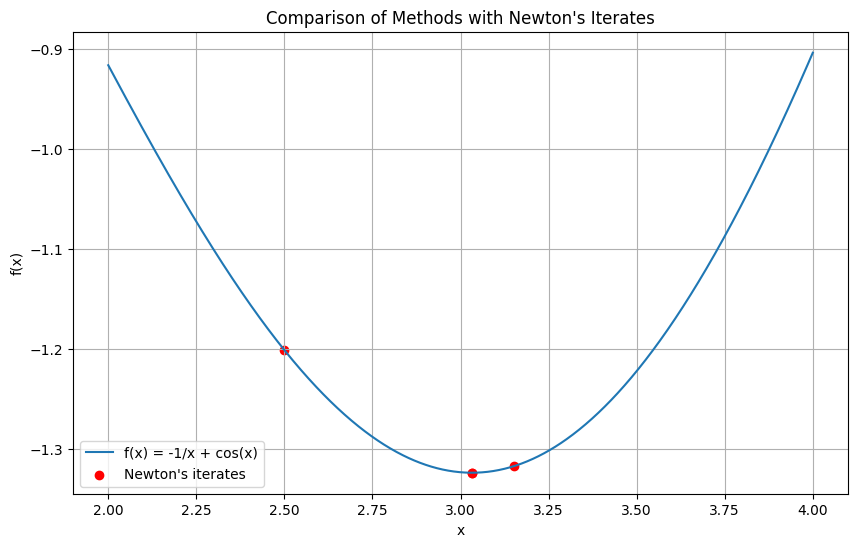

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from scipy.optimize import bisect, golden

# Parameters
a, b = 2, 4
x0 = 2.5
precision = 1e-5

# Define the function and its derivatives
def f(x):
    return -1 / x + np.cos(x)

def df(x):
    return 1 / x**2 - np.sin(x)

def d2f(x):
    return -2 / x**3 - np.cos(x)

# Dichotomy Method
def dichotomy_method(f, interval, precision):
    a, b = interval
    iterations = 0
    while abs(b - a) > precision:
        midpoint = (a + b) / 2
        if f(a) * f(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint

        iterations += 1
    return (a + b) / 2, iterations

# Newton's Method
def newton_method(f, df, x0, tol, max_iter=100):
    x = x0
    iterates = [x0]
    for i in range(max_iter):
        if abs(f(x)) < tol:
            return x, i, iterates
        if df(x) == 0:
            raise ValueError("ERROR: Derivative is zero. Newton's method fails.")
        x = x - f(x) / df(x)
        iterates.append(x)

    raise ValueError("ERROR: Newton's method did not converge within the maximum number of iterations.")

# Golden Section Method
def golden_section_method(f, a, b, precision):
    rho = (1 + np.sqrt(5)) / 2 
    x1 = a/rho + (1 - 1/rho) * b 
    x2 = b/rho + (1 - 1/rho) * a
    iterations = 0

    while abs(b - a) > precision:
        if f(x1) < f(x2):
            b = x2
            x2 = x1
            x1 = a/rho + (1 - 1/rho) * b 
        else:
            a = x1
            x1 = x2
            x2 = b/rho + (1 - 1/rho) * a

        iterations += 1

    return (a + b) / 2, iterations

# Comparison
# 1 - Dichotomy
start = time()
dichotomy_min, dichotomy_iter = dichotomy_method(df, (a, b), precision)
dichotomy_time = time() - start

# 2 - Newton
start = time()
newton_min, newton_iter, newton_iterates = newton_method(df, d2f, x0, precision)
newton_time = time() - start

# 3 - Golden section
start = time()
golden_min, golden_iter = golden_section_method(f, a, b, precision)
golden_time = time() - start


# Print results
print(f"Dichotomy: Minimum at {dichotomy_min}, Iterations: {dichotomy_iter}, Time: {dichotomy_time:.5f} s")
print(f"Newton: Minimum at {newton_min}, Iterations: {newton_iter}, Time: {newton_time:.5f} s")
print(f"Golden Section: Minimum at {golden_min}, Iterations: {golden_iter}, Time: {golden_time:.5f} s")

# Plot the function and Newton's iterates
x = np.linspace(a, b, 1000)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="f(x) = -1/x + cos(x)")
plt.scatter(newton_iterates, [f(xi) for xi in newton_iterates], color="red", label="Newton's iterates")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Comparison of Methods with Newton's Iterates")
plt.legend()
plt.grid()
plt.show()
